In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sa
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import scipy
from scipy import stats

In [2]:
df = pd.read_csv('/Users/jiajia/Desktop/INF2178_MIDTERM _PROJECT/DataSets/diabetes.csv')
df.head()
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [3]:
#Data Cleaning & Exploratory Design Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<AxesSubplot:>

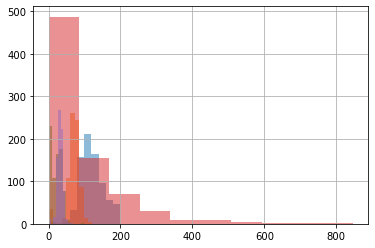

In [8]:
df['Glucose'].hist(alpha=0.5)
df['BloodPressure'].hist(alpha=0.5)
df['SkinThickness'].hist(alpha=0.5)
df['Insulin'].hist(alpha=0.5)
df['BMI'].hist(alpha=0.5)

In [9]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].median()

Glucose          117.0
BloodPressure     72.0
SkinThickness     23.0
Insulin           30.5
BMI               32.0
dtype: float64

In [10]:
#Check if there is any 0 in Glucose, BloodPressure, SkinThickness, Insulin and BMI,by checking the min value
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
df['Glucose'].replace(0,117.0,inplace=True)
df['BloodPressure'].replace(0,72.0,inplace=True)
df['SkinThickness'].replace(0,23.0,inplace=True)
df['Insulin'].replace(0,30.5,inplace=True)
df['BMI'].replace(0,32.0,inplace=True)

In [12]:
diabetes.to_csv("cleaned_diabetes.csv", index=False)

NameError: name 'diabetes' is not defined

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

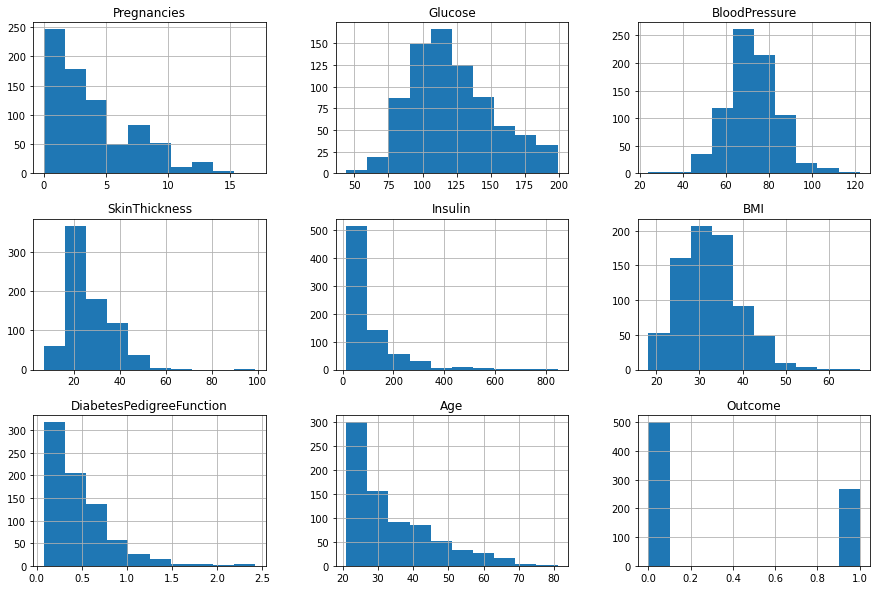

In [13]:
df.hist(figsize=(15,10))

In [13]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

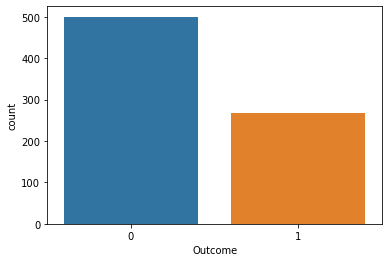

In [14]:
ax = sns.countplot(x=df['Outcome'])

Text(0.5, 1.0, 'Two-Sample T-test')

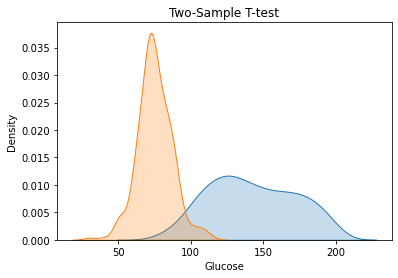

In [30]:
#Age doesn't have a normal distribution, therefore, t-tests are conducted on Glucose and Blood Pressure
sns.kdeplot((df['Glucose'][df["Outcome"]==1]), shade=True)
sns.kdeplot((df['BloodPressure'][df["Outcome"]==1]), shade=True)
plt.title("Two-Sample T-test")

In [34]:
tStat, pValue = stats.ttest_ind((df['Glucose'][df["Outcome"]==1]),(df['BloodPressure'][df["Outcome"]!=1]), equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
#P-value is smaller than alpha=0.5, the null hypothesis is rejected

P-Value:5.479103353855729e-119 T-Statistic:37.81067034680236


In [17]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   
Outcome                   0.148457  0.312249                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [18]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

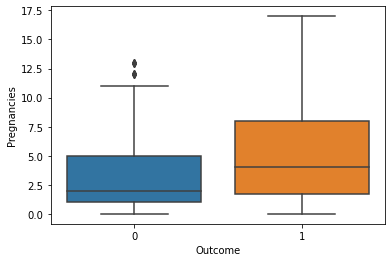

In [19]:
sns.boxplot(x=df["Outcome"],y=df["Pregnancies"])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

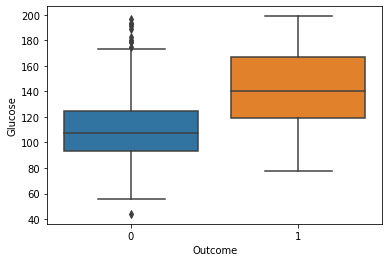

In [20]:
sns.boxplot(x=df["Outcome"],y=df["Glucose"])

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

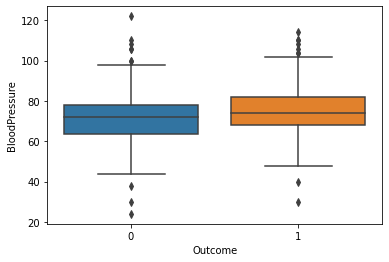

In [21]:
sns.boxplot(x=df["Outcome"],y=df["BloodPressure"])

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

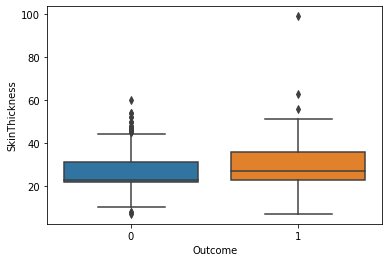

In [22]:
sns.boxplot(x=df["Outcome"],y=df["SkinThickness"])

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

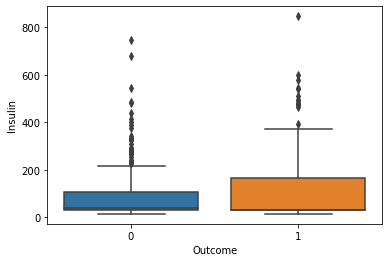

In [23]:
sns.boxplot(x=df["Outcome"],y=df["Insulin"])

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

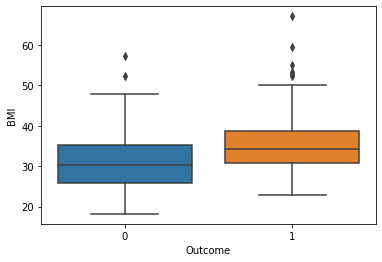

In [24]:
sns.boxplot(x=df["Outcome"],y=df["BMI"])

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

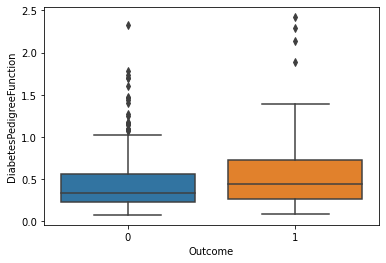

In [25]:
sns.boxplot(x=df["Outcome"],y=df["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

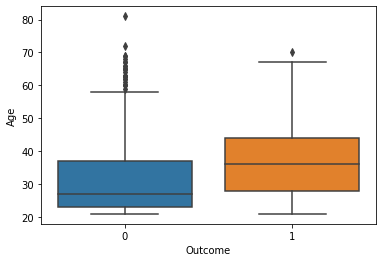

In [26]:
sns.boxplot(x=df["Outcome"],y=df["Age"])

In [27]:
#Bivariate Analysis- Insulin and Glucose

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

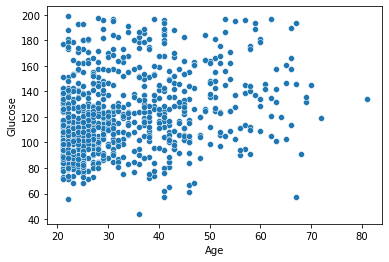

In [28]:
sns.scatterplot(x=df["Age"], y=df["Glucose"])

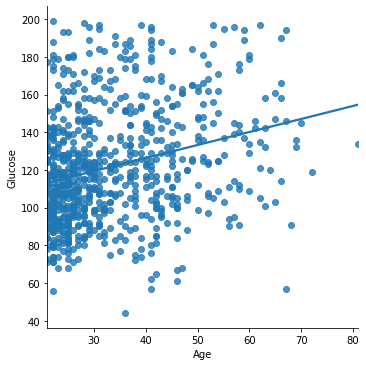

In [29]:
sns.lmplot(x='Age', y='Glucose',data=df,ci=None)

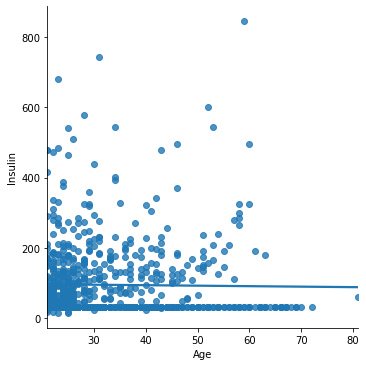

In [30]:
sns.lmplot(x='Age', y='Insulin',data=df,ci=None)

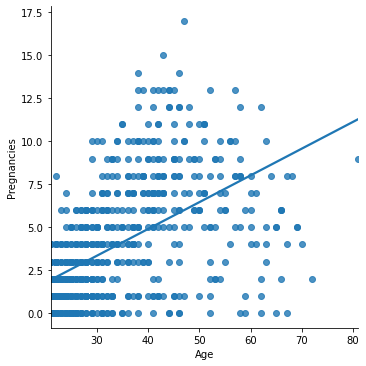

In [31]:
sns.lmplot(x='Age', y='Pregnancies',data=df,ci=None)

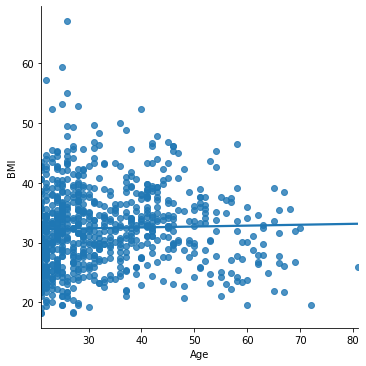

In [32]:
sns.lmplot(x='Age', y='BMI',data=df,ci=None)

<AxesSubplot:xlabel='Glucose'>

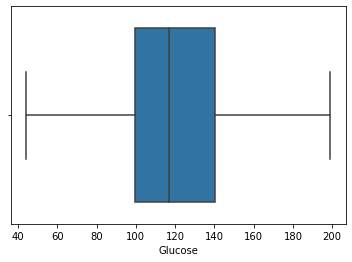

In [33]:
sns.boxplot(x=df['Glucose'])

<AxesSubplot:xlabel='Insulin'>

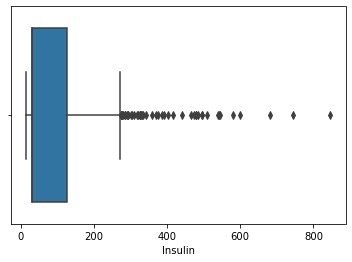

In [34]:
sns.boxplot(x=df['Insulin'])

<AxesSubplot:xlabel='BloodPressure'>

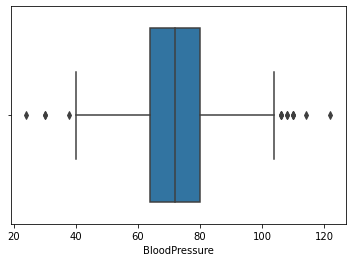

In [35]:
sns.boxplot(x=df['BloodPressure'])

In [36]:
Youth_df = df[(df["Age"]>18)&(df["Age"]<=35)]
Youth_df.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                367      367            367            367      367  367   
1                131      131            131            131      131  131   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             367  367  
1                             131  131

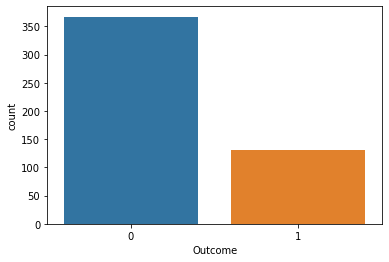

In [37]:
ax = sns.countplot(x=Youth_df['Outcome'])

In [38]:
MiddleAged_df = df[(df["Age"]>36)&(df["Age"]<=55)]
MiddleAged_df.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                 94       94             94             94       94   94   
1                110      110            110            110      110  110   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                              94   94  
1                             110  110

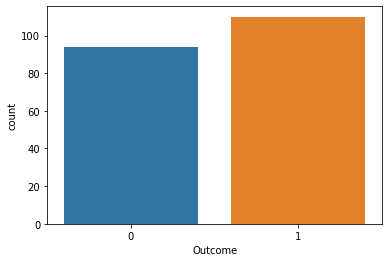

In [39]:
ax = sns.countplot(x=MiddleAged_df['Outcome'])

In [40]:
Elder_df = df[(df["Age"]>55)&(df["Age"]<=81)]
Elder_df.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                 33       33             33             33       33   33   
1                 17       17             17             17       17   17   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                              33   33  
1                              17   17

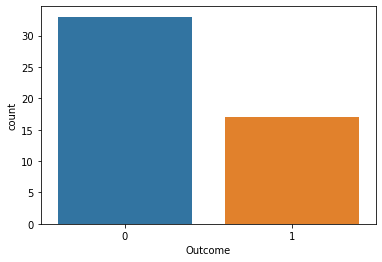

In [41]:
ax = sns.countplot(x=Elder_df['Outcome'])

In [42]:
#Multiple Linear Regression

In [43]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [44]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [45]:
X = df[['Pregnancies', 'Glucose', 'SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']]
y = df['Outcome']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies                  0.015959
Glucose                      0.006612
SkinThickness               -0.000781
Insulin                     -0.000245
BMI                          0.014640
Age                          0.002123
DiabetesPedigreeFunction     0.135576

In [49]:
#Make the prediction
y_pred = regressor.predict(X_test)

In [50]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

Actual  Predicted
661       1   1.081088
122       0   0.213639
113       0   0.071443
14        1   0.611873
529       0   0.150610

In [53]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.3049806697141766
MSE: 0.13675516857502398
RMSE: 0.3698042300664285


In [54]:
# Anova

In [71]:
# read the cleaned data
df = pd.read_csv('cleaned_diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [92]:
# create a categorical Age Group variable according to conditions
df['AgeGroup'] = df.apply(lambda x: '18~35' if (18 < x['Age'] <= 35) else '36~55' if (35 < x['Age'] <= 55) else '55~81' if (
            55 < x['Age'] <= 81) else 0, axis=1)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome AgeGroup  
763                     0.171   63        0    55~81  
764                     0.340   27        0    18~35  
765                     0.245   30        0    18~35  
766                     0.349   47        1    36~55  
767                     0.315   23        0    18~35

In [93]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome AgeGroup  
763                     0.171   63        0    55~81  
764                     0.340   27        0    18~35  
765                     0.245   30        0    18~35  
766                     0.349   47        1    36~55  
767                     0.315   23        0    18~35

In [85]:
# fit an OLS model on Age, not categorical Age Group
model1 = ols('Glucose ~ Age', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     58.76
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           5.41e-14
Time:                        05:52:38   Log-Likelihood:                -3684.1
No. Observations:                 768   AIC:                             7372.
Df Residuals:                     766   BIC:                             7382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.6926      3.178     31.059      0.000      92.455     104.930
Age            0.6908      0.090      7.665      0.000       0.514       0.868
==============================================================================
Omnibus:                       26.944   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.247
Skew:                           0.477   Prob(JB):                     4.46e-07
Kurtosis:                       2.949   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
table1 = sa.stats.anova_lm(model0, typ=3)
table0

sum_sq     df           F         PR(>F)
Intercept  831184.931122    1.0  964.689199  1.018267e-137
Age         50624.728032    1.0   58.756032   5.409896e-14
Residual   659992.521968  766.0         NaN            NaN

In [87]:
model2 = ols('Glucose ~ C(Outcome)', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     245.7
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           3.13e-48
Time:                        05:52:54   Log-Likelihood:                -3605.7
No. Observations:                 768   AIC:                             7215.
Df Residuals:                     766   BIC:                             7225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         110.6820      1.185     93.382      0.000     108.355     113.009
C(Outcome)[T.1]    31.4486      2.006     15.674      0.000      27.510      35.387
==============================================================================
Omnibus:                       19.072   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.149
Skew:                           0.394   Prob(JB):                     4.22e-05
Kurtosis:                       2.900   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
table2 = sa.stats.anova_lm(model2, typ=3)
table2

sum_sq     df            F        PR(>F)
Intercept   6.125253e+06    1.0  8720.195187  0.000000e+00
C(Outcome)  1.725624e+05    1.0   245.667855  3.128719e-48
Residual    5.380549e+05  766.0          NaN           NaN

In [95]:
model3 = ols('Glucose ~ C(AgeGroup)', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     22.85
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           2.30e-10
Time:                        06:07:25   Log-Likelihood:                -3690.2
No. Observations:                 768   AIC:                             7386.
Df Residuals:                     765   BIC:                             7400.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              116.5040      1.327     87.815      0.000     113.900     119.108
C(AgeGroup)[T.36~55]    13.2187      2.397      5.515      0.000       8.514      17.924
C(AgeGroup)[T.55~81]    20.9760      4.392      4.776      0.000      12.354      29.598
==============================================================================
Omnibus:                       25.731   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.814
Skew:                           0.465   Prob(JB):                     9.13e-07
Kurtosis:                       2.943   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
table3 = sa.stats.anova_lm(model1, typ=3)
table1

sum_sq     df           F         PR(>F)
Intercept  831184.931122    1.0  964.689199  1.018267e-137
Age         50624.728032    1.0   58.756032   5.409896e-14
Residual   659992.521968  766.0         NaN            NaN

In [91]:
age_posthoc = sp.posthoc_ttest(df, val_col='Glucose', group_col='AgeGroup', p_adjust='holm')
age_posthoc

36~55         18~35     55~81
36~55  1.000000e+00  1.137682e-07  0.128656
18~35  1.137682e-07  1.000000e+00  0.000002
55~81  1.286557e-01  1.746252e-06  1.000000

In [2]:
#Final Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sa
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import scipy
from scipy import stats

In [2]:
df = pd.read_csv('/Users/jiajia/Desktop/Jiajia-Ma-Final/cleaned_diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Ancova

In [6]:
# create a categorical Age Group variable according to conditions
df['AgeGroup'] = df.apply(lambda x: '18~35' if (18 < x['Age'] <= 35) else '36~55' if (35 < x['Age'] <= 55) else '55~81' if (
            55 < x['Age'] <= 81) else 0, axis=1)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup  
0                     0.627   50        1    36~55  
1                     0.351   31        0    18~35  
2                     0.672   32        1    18~35  
3                     0.167   21        0    18~35  
4                     2.288   33        1    18~35

In [27]:
from pingouin import ancova
ancova(data=df, dv='Outcome', covar=['Insulin', 'BloodPressure','SkinThickness','BMI', 'Pregnancies'], between='AgeGroup')

Source          SS   DF          F         p-unc       np2
0       AgeGroup    3.180553    2   8.395666  2.474595e-04  0.021616
1        Insulin    2.135200    1  11.272521  8.257734e-04  0.014615
2  BloodPressure    0.064686    1   0.341503  5.591363e-01  0.000449
3  SkinThickness    0.000319    1   0.001683  9.672843e-01  0.000002
4            BMI    7.733344    1  40.827218  2.897788e-10  0.050981
5    Pregnancies    1.781279    1   9.404037  2.241823e-03  0.012222
6       Residual  143.956451  760        NaN           NaN       NaN

In [9]:
#Power Analysis

In [22]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

In [23]:
effect_size = 0.8 #Common effect size
alpha = 0.05 # significance level, Type 1 error
power = 0.8 #Statistical power, Type 2 error= 1-0.8=0.2

In [24]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


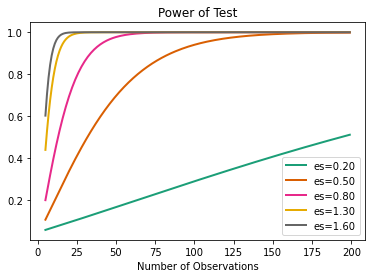

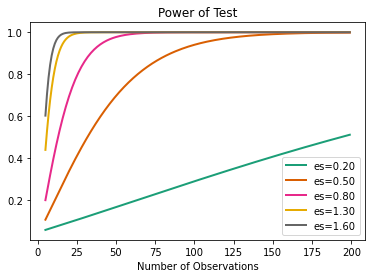

In [25]:
analysis = TTestIndPower()
effect_sizes = np.array([0.2, 0.5, 0.8, 1.3, 1.6])
sample_sizes = np.array(range(5, 200))
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)